## Análise de Vendas
#### Vamos tirar alguns insights dos dados

Para essa análise temos 12 planilhas com histórico de vendas de um ecommerce.

Vamos tirar algumas ideias valiosas desses dados.

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import os

Vamos começar compilando nossos 12 arquivos de vendas em apenas um Data Frame

In [88]:
os.listdir() #Vamos usar a lista de arquivos da pasta para compilar os arquivos no data frame

['.ipynb_checkpoints',
 'Projeto Análise de Vendas - Python & Pandas.ipynb',
 'Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [89]:
vendas = pd.DataFrame() #Criamos um datafram vazio
vendas = pd.concat(
    map(pd.read_csv, [
 'Sales_January_2019.csv',        
 'Sales_February_2019.csv', 
 'Sales_March_2019.csv',
 'Sales_April_2019.csv',
 'Sales_May_2019.csv',
 'Sales_June_2019.csv',       
 'Sales_July_2019.csv',        
 'Sales_August_2019.csv',
 'Sales_September_2019.csv',        
 'Sales_October_2019.csv',        
 'Sales_November_2019.csv',        
 'Sales_December_2019.csv'
]), ignore_index = True) #Compilamos os dados de vendas ao dataframe

In [90]:
#Vamos dar uma olhadinha nos dados:
display(vendas)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


### Para nossa análise, vamos responder algumas perguntas de negócio:

#### Primeiro vamos limpar, organizar e dar uma carinha nova ao DataFrame

In [91]:
#Vamos começar padronizando os dados

vendas.info() #Todas as colunas estão cadastradas como string, mas precisamos melhorar isso

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [92]:
#Vamos trocar o índice da planilha para constar o Order ID
vendas = vendas.set_index('Order ID')

#Vamos remover alguns dados errados do Data Frame
vendas.drop(vendas[vendas['Price Each'] == 'Price Each'].index, inplace = True)

#Vamos criar uma coluna para identificar os meses

vendas['Mês'] = vendas['Order Date'].str[:2]
vendas['Mês'] = vendas['Mês'].astype('category') #Mudamos o mês para categoria
vendas['Product'] = vendas['Product'].astype('category') #Como há poucos produtos, mudamos para categoria

vendas['Quantity Ordered'] = vendas['Quantity Ordered'].astype('float') #Este é um campo interessante para cálculo então mudamos para float
vendas['Price Each'] = vendas['Price Each'].astype('float') #Mesma coisa para o campo de vendas unitárias


### Agora vamos começar a explorar as questões de negócio
### 1. Qual o mês com maior faturamento?

In [93]:
#Alguns itens foram comprados em mais de uma unidade, então precisamos multiplicar a quant de peças pelo preço unit

vendas['Total produto'] = vendas['Quantity Ordered'] * vendas['Price Each']

In [94]:
#Listamos os meses por ordem de faturamento

vendas.groupby('Mês').sum().sort_values(by = 'Total produto', ascending = False)

,Quantity Ordered,Price Each,Total produto
Mês,,,
12,28114.0,4.588415e+06,4.613443e+06
10,22703.0,3.715555e+06,3.736727e+06
04,20558.0,3.367671e+06,3.390670e+06
11,19798.0,3.180601e+06,3.199603e+06
05,18667.0,3.135125e+06,3.152607e+06
03,17005.0,2.791208e+06,2.807100e+06
07,16072.0,2.632540e+06,2.647776e+06
06,15253.0,2.562026e+06,2.577802e+06
08,13448.0,2.230345e+06,2.244468e+06


In [95]:
#Podemos ver qual o mês de maior faturamento assim:
vendas.groupby('Mês').sum().idxmax()

Quantity Ordered    12
Price Each          12
Total produto       12
dtype: object

In [96]:
#Ou os valores do mês de maior faturamento:
vendas.groupby('Mês').sum().max()

Quantity Ordered    2.811400e+04
Price Each          4.588415e+06
Total produto       4.613443e+06
dtype: float64

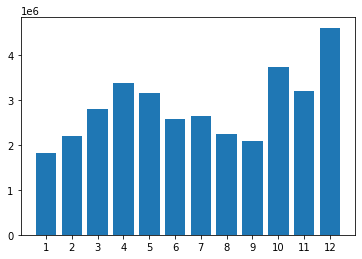

In [97]:
#Podemos ver a evolução das vendas durante o ano no gráfico abaixo:

venda_mes_a_mes = pd.Series(vendas.groupby('Mês').sum()['Total produto'])
meses = range(1, 13)

plt.bar(meses, venda_mes_a_mes)
plt.xticks(meses) #Para ver todos os meses na exibição
plt.show()

### Insight:
#### - Com o faturamento mensal, a empresa pode se preparar para cenários e criar previsões sobre demanda, abastecimento, etc.
#### - Além de poder direcionar melhor seus investimentos em marketing, e entender a eficiência de determinadas atitudes tomadas durante o ano


### 2. Qual cidade teve o maior volume de vendas?

In [98]:
#Primeiro vamos criar uma lista com o split do endereço e usar isso nas colunas do dataframe

endereco = vendas['Purchase Address'].str.split(',', expand = True)
vendas['Rua'] = endereco[0]
vendas['Cidade'] = endereco[1]
vendas['Estado + CEP'] = endereco[2]

In [99]:
#Agora sim vamos olhar as cidades com maior faturamento

venda_cidade = pd.DataFrame(vendas.groupby('Cidade').sum().sort_values(by = 'Total produto', ascending = False))
cidade = venda_cidade.index
venda_cidade

,Quantity Ordered,Price Each,Total produto
Cidade,,,
San Francisco,50239.0,8.211462e+06,8.262204e+06
Los Angeles,33289.0,5.421435e+06,5.452571e+06
New York City,27932.0,4.635371e+06,4.664317e+06
Boston,22528.0,3.637410e+06,3.661642e+06
Atlanta,16602.0,2.779908e+06,2.795499e+06
Dallas,16730.0,2.752628e+06,2.767975e+06
Seattle,16553.0,2.733296e+06,2.747755e+06
Portland,14053.0,2.307747e+06,2.320491e+06
Austin,11153.0,1.809874e+06,1.819582e+06


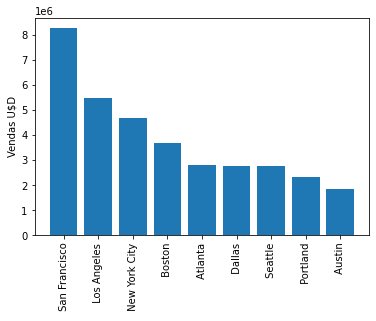

In [100]:
plt.bar(cidade, venda_cidade['Total produto'])
plt.xticks(cidade, rotation = 'vertical')
plt.ylabel('Vendas U$D')
plt.show()

### Insight:
####  - Em posse do faturamento por cidade, a empresa pode entender sua relevância no mercado e pulverização de suas ações de marketing, podendo direcionar seus esforços para cidades estratégicas ou buscando aumentar sua relevância em cidades de menor faturamento


### 3. Qual o horário de maior volume de vendas?

In [101]:
#Nosso dataframe possui o horário que as compras foram realizadas. Vamos tirar alguns insights disso

vendas['Hora'] = pd.to_datetime(vendas['Order Date']).dt.hour #Criamos uma coluna com o horário da venda

In [102]:
vendas_hora = pd.DataFrame(vendas['Hora'].value_counts()) #Esta variável calcula as vendas por hora
vendas_hora = vendas_hora.sort_index()
horas = range(0,25)

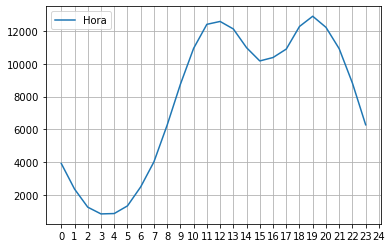

In [104]:
vendas_hora.plot()
plt.xticks(horas)
plt.grid()
plt.show()


### Insight:
####  - Há dois picos nas vendas da empresa. A organização pode usar essa informação para escolher os horários de anúncios em sites e redes sociais.
####  - Durante a madrugada a empresa possui níveis de vendas muito baixos, então a empresa pode usar isso para direcionar vendas e promoções rápidas para atrair novos clientes
